<a href="https://colab.research.google.com/github/Domadrona/Sensores1_DL/blob/master/Practica_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inicio de prueba


*   1
*   2



In [0]:
print('hello')

hello


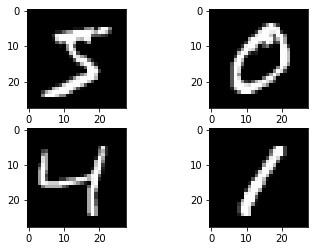

In [0]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
(x_train,y_train), (x_test, y_test) = mnist.load_data()
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
plt.show()

In [0]:
from time import time
from numpy.random import seed
seed(1)
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Flatten
from keras.utils import np_utils
tiempo_inicial = time()
(x_train,y_train), (x_test, y_test) = mnist.load_data()

In [0]:
print(x_train.shape)#tengo 60000 imagenes de 28X28
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [0]:
print('el valor dentro de la primera posicion de Y es ()', format(y_train[0,]))
print()
print()
print(x_train[0,:,:])

el valor dentro de la primera posicion de Y es () 5


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0 

In [0]:
x_train = x_train.reshape(60000, 28, 28, 1)#no entiendo, cambia la forma, como y para que?
x_test = x_test.reshape(10000, 28, 28, 1)
y_train = np_utils.to_categorical(y_train, 10)#cambia a categoricas la y 2= 00100
y_test = np_utils.to_categorical(y_test, 10)
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


In [0]:
print('El valor del modelo dentro de x: ')
print(x_train[0,:,:,0])
print()
print('valores dentro de y')
print(y_train[0,:])

El valor del modelo dentro de x: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0 

Hago modelo
#

In [0]:
model = Sequential([Convolution2D(filters=32,#32 filtros
                                  kernel_size = (3, 3), #tamaño filtro
                                  input_shape = (28, 28, 1)),#first conv layer#se debe saber el tamaño de imagen
                                  Activation('relu'),#fn de activacion
                    Convolution2D(filters=32,#la salida anterior entra a otra convolucion
                                  kernel_size = (3, 3)), #tamaño filtro
                                  Activation('relu'),
                    MaxPooling2D(pool_size=(2,2)),#reduzco con maxpooling a 2,2
                    Flatten(),#flatten the output tensor
                    Dense(64),#fully conected hidden layer capa densa de 64 neuronas
                    Activation('relu'),
                    Dense(10),# densa de 10 porque tiene 10 posibles valores a clasificar
                    Activation('softmax')])#clasificacion de softmax, entrega prob de pertener a cada modelo
print(model.summary()) # mustra como se construye el modelo

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_13 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)               

In [0]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adadelta')        #no solo capas sino que se optimiza, neuronas conectadas, listas
model.fit(x_train, y_train, batch_size=100, epochs=10, validation_split=0.1, verbose=1)# aquí el entrenamiento del modelo bachsize se entrena de a 100 hasta como con todas# epochs es cantidad de rep que usa el modelo, validacion 10%, verbose muestra avance 
score = model.evaluate(x_test, y_test, verbose=1)# evaluo modelo con conjunto test final
print('Test accuracy: ', score[1])

tiempo_final = time()
tiempo_ejecucion = tiempo_final - tiempo_inicial
print('El tiempo de ejecucion fue: ', tiempo_ejecucion)


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 85s 2ms/step - loss: 0.4868 - accuracy: 0.9250 - val_loss: 0.0801 - val_accuracy: 0.9792
Epoch 2/10
54000/54000 [==============================] - 84s 2ms/step - loss: 0.0583 - accuracy: 0.9828 - val_loss: 0.0676 - val_accuracy: 0.9845
Epoch 3/10
54000/54000 [==============================] - 85s 2ms/step - loss: 0.0322 - accuracy: 0.9905 - val_loss: 0.0495 - val_accuracy: 0.9890
Epoch 4/10
54000/54000 [==============================] - 84s 2ms/step - loss: 0.0179 - accuracy: 0.9942 - val_loss: 0.0575 - val_accuracy: 0.9887
Epoch 5/10
54000/54000 [==============================] - 84s 2ms/step - loss: 0.0109 - accuracy: 0.9966 - val_loss: 0.0651 - val_accuracy: 0.9878
Epoch 6/10
54000/54000 [==============================] - 84s 2ms/step - loss: 0.0070 - accuracy: 0.9979 - val_loss: 0.0678 - val_accuracy: 0.9888
Epoch 7/10
54000/54000 [==============================] - 85s 2ms/ste

### Prueba con GPU para comparar

In [0]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'], optimizer='adadelta')        #no solo capas sino que se optimiza, neuronas conectadas, listas
model.fit(x_train, y_train, batch_size=100, epochs=10, validation_split=0.1, verbose=1)# aquí el entrenamiento del modelo bachsize se entrena de a 100 hasta como con todas# epochs es cantidad de rep que usa el modelo, validacion 10%, verbose muestra avance 
score = model.evaluate(x_test, y_test, verbose=1)# evaluo modelo con conjunto test final
print('Test accuracy: ', score[1])

tiempo_final = time()
tiempo_ejecucion = tiempo_final - tiempo_inicial
print('El tiempo de ejecucion fue: ', tiempo_ejecucion)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 49us/step - loss: 0.4489 - accuracy: 0.9279 - val_loss: 0.0637 - val_accuracy: 0.9810
Epoch 2/10
54000/54000 [==============================] - 3s 46us/step - loss: 0.0570 - accuracy: 0.9825 - val_loss: 0.0533 - val_accuracy: 0.9850
Epoch 3/10
54000/54000 [==============================] - 3s 47us/step - loss: 0.0296 - accuracy: 0.9912 - val_loss: 0.0398 - val_accuracy: 0.9900
Epoch 4/10
54000/54000 [==============================] - 2s 46us/step - loss: 0.0174 - accuracy: 0.9945 - val_loss: 0.0398 - val_accuracy: 0.9910
Epoch 5/10
54000/54000 [==============================] - 3s 47us/step - loss: 0.0092 - accuracy: 0.9974 - val_loss: 0.0509 - val_accuracy: 0.9908
Epoch 6/10
54000/54000 [==============================] - 3s 46us/step - loss: 0.0063 - accuracy: 0.9981 - val_loss: 0.0524 - val_accuracy: 0.9900
Epoch 7/10
54000/54000 [==============================] - 3s 46us/ste

## Ahora con imagenes de otro repositorio

In [0]:
from PIL import Image #libreria base de datos de imagenes
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True
from google.colab import files #para que permita importar archivos

uploaded = files.upload()

Saving 4pr.bmp to 4pr.bmp


In [0]:
import numpy as np
img = Image.open('4pr.bmp')#cargo imagen a travez del lib pil
new_img = img.resize((28,28))
new_img = new_img.convert('L')#??
new = np.array(new_img)
print(np.shape(new))

(28, 28)


In [0]:
img = new.reshape(1, 28, 28, 1)#(numero de muestras,tamaño, de imagen, canales tiene la imagen RGB grey 4 canales png)
img = img.astype('float32')#para que?
img = img/255.0 #normalizar?
result = model.predict_classes(img)
result[0]

8

In [0]:
from google.colab import drive
drive.mount('/content/drive')